In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Reading the data
# Path to the MQTT DDoS Connect Flood training dataset
# Note: Update the path if your dataset is stored elsewhere.
data_dir_MQTT = "MQTT-DDoS-Connect_Flood_train.pcap.csv"

# Path to the benign traffic training dataset
# Note: Update the path if your dataset is stored elsewhere.
data_dir_benign = "Benign_train.pcap.csv"

# Load the benign dataset into a Pandas DataFrame
# The 'benign_data' variable will store all benign traffic data
benign_data = pd.read_csv(data_dir_benign)

# Load the attack dataset into a Pandas DataFrame
# The 'attack_data' variable will store all attack traffic data
attack_data = pd.read_csv(data_dir_MQTT)


In [ ]:
# Adding the classification column
# Assign the label '0' to benign data and '1' to attack data
benign_data['Label'] = 0
attack_data['Label'] = 1

# Merging the datasets
# Combine benign and attack data into one DataFrame along the row axis
combined_data = pd.concat([benign_data, attack_data], axis=0)

# Keeping a copy of the original data
# Create a deep copy of the combined dataset for backup
original_data = combined_data.copy()

In [ ]:
# Displaying the number of rows in benign and attack datasets
# This gives the count of benign data records
print(f"There are {benign_data.shape[0]} samples in benign data")

# This gives the count of attack data records
print(f"There are {attack_data.shape[0]} samples in attack data")


There are 192732 samples in benign data
There are 173036 samples in attack data


In [ ]:
# Displaying the first five rows of benign data
benign_data.head()

,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,Label
0,134.3,7.1,64.0,40415.288318,40415.288318,0.0,0.0,0.0,0.0,0.5,...,48.225852,95.3,1.694641e+08,5.5,15.312231,68.201654,2644.242675,0.9,38.5,0
1,137.0,4.7,49.9,58749.191833,58749.191833,0.0,0.0,0.0,0.0,0.2,...,59.753361,125.6,1.694641e+08,13.5,13.468364,84.997147,5328.483794,1.0,244.6,0
2,283.9,6.0,64.0,3.497439,3.497439,0.0,0.0,0.0,0.0,0.5,...,10.223690,80.6,8.070469e-05,5.5,12.229315,14.458481,124.725884,0.9,38.5,0
3,297.3,6.0,64.0,7297.703020,7297.703020,0.0,0.0,0.0,0.0,0.5,...,15.625023,78.5,1.694641e+08,13.5,12.552920,21.904691,240.536207,1.0,244.6,0
4,572.3,7.1,57.7,2.549120,2.549120,0.0,0.0,0.0,0.0,0.4,...,69.738867,139.0,9.993820e-02,5.5,13.928729,98.625651,11737.768847,0.9,38.5,0


In [ ]:
# Displaying the first five rows of attack data
attack_data.head()

,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,Label
0,78.83,6.0,64.0,1004.071692,1004.071692,0.0,0.35,0.15,0.00,0.09,...,2.498553,72.02,1.016005e+08,9.5,12.015496,3.536281,10.003126,0.64,141.55,1
1,87.77,6.0,64.0,5835.004785,5835.004785,0.0,0.27,0.33,0.02,0.22,...,5.139861,72.57,8.466704e+07,9.5,12.022479,7.266232,38.690789,0.86,141.55,1
2,93.36,6.0,64.0,6251.338969,6251.338969,0.0,0.50,0.26,0.02,0.41,...,3.345496,74.19,8.466704e+07,9.5,12.186022,4.720415,14.940422,0.85,141.55,1
3,81.77,6.0,64.0,93.072834,93.072834,0.0,0.87,0.08,0.00,0.85,...,2.942810,81.11,8.466704e+07,9.5,12.730049,4.168582,15.583377,0.77,141.55,1
4,85.30,6.0,64.0,617.284243,617.284243,0.0,0.39,0.28,0.03,0.24,...,3.923804,74.16,8.466704e+07,9.5,12.144994,5.549455,18.176773,0.89,141.55,1


In [ ]:
# Displaying metadata information for benign data
# Includes column data types, non-null values, and memory usage
benign_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192732 entries, 0 to 192731
Data columns (total 46 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Header_Length    192732 non-null  float64
 1   Protocol Type    192732 non-null  float64
 2   Duration         192732 non-null  float64
 3   Rate             192732 non-null  float64
 4   Srate            192732 non-null  float64
 5   Drate            192732 non-null  float64
 6   fin_flag_number  192732 non-null  float64
 7   syn_flag_number  192732 non-null  float64
 8   rst_flag_number  192732 non-null  float64
 9   psh_flag_number  192732 non-null  float64
 10  ack_flag_number  192732 non-null  float64
 11  ece_flag_number  192732 non-null  float64
 12  cwr_flag_number  192732 non-null  float64
 13  ack_count        192732 non-null  float64
 14  syn_count        192732 non-null  float64
 15  fin_count        192732 non-null  float64
 16  rst_count        192732 non-null  floa

In [ ]:
# Checking for missing values in the benign dataset
# Outputs the count of missing values for each column
print("Missing values in Benign data:")
print(benign_data.isnull().sum())

# Checking for missing values in the attack dataset
# Outputs the count of missing values for each column
print("\nMissing values in Attack data:")
print(attack_data.isnull().sum())


Missing values in Benign data:
Header_Length      0
Protocol Type      0
Duration           0
Rate               0
Srate              0
Drate              0
fin_flag_number    0
syn_flag_number    0
rst_flag_number    0
psh_flag_number    0
ack_flag_number    0
ece_flag_number    0
cwr_flag_number    0
ack_count          0
syn_count          0
fin_count          0
rst_count          0
HTTP               0
HTTPS              0
DNS                0
Telnet             0
SMTP               0
SSH                0
IRC                0
TCP                0
UDP                0
DHCP               0
ARP                0
ICMP               0
IGMP               0
IPv                0
LLC                0
Tot sum            0
Min                0
Max                0
AVG                0
Std                0
Tot size           0
IAT                0
Number             0
Magnitue           0
Radius             0
Covariance         0
Variance           0
Weight             0
Label              0
dty

In [ ]:
# Displaying the column names for attack and benign datasets
# Lists all the column names in the attack dataset
print("Attack data columns names: ",attack_data.keys())
# Lists all the column names in the benign dataset
print("Benign data columns names: ", benign_data.keys())


Attack data columns names:  Index(['Header_Length', 'Protocol Type', 'Duration', 'Rate', 'Srate', 'Drate',
       'fin_flag_number', 'syn_flag_number', 'rst_flag_number',
       'psh_flag_number', 'ack_flag_number', 'ece_flag_number',
       'cwr_flag_number', 'ack_count', 'syn_count', 'fin_count', 'rst_count',
       'HTTP', 'HTTPS', 'DNS', 'Telnet', 'SMTP', 'SSH', 'IRC', 'TCP', 'UDP',
       'DHCP', 'ARP', 'ICMP', 'IGMP', 'IPv', 'LLC', 'Tot sum', 'Min', 'Max',
       'AVG', 'Std', 'Tot size', 'IAT', 'Number', 'Magnitue', 'Radius',
       'Covariance', 'Variance', 'Weight', 'Label'],
      dtype='object')
Benign data columns names:  Index(['Header_Length', 'Protocol Type', 'Duration', 'Rate', 'Srate', 'Drate',
       'fin_flag_number', 'syn_flag_number', 'rst_flag_number',
       'psh_flag_number', 'ack_flag_number', 'ece_flag_number',
       'cwr_flag_number', 'ack_count', 'syn_count', 'fin_count', 'rst_count',
       'HTTP', 'HTTPS', 'DNS', 'Telnet', 'SMTP', 'SSH', 'IRC', 'TCP', 'UD

In [ ]:
# Displaying the number of features (columns) in each dataset
print("number of features in attack data = ", len(attack_data.keys()))
print("number of numerical features in benign data = ", len(benign_data.keys()))

number of features in attack data =  46
number of numerical features in benign data =  46


In [ ]:
# Extracting numerical columns from the datasets
# List of numerical columns in the attack dataset
numerical_columns_attack = attack_data.select_dtypes(include=[np.number]).columns.tolist()

# List of numerical columns in the benign dataset
numerical_columns_beingn = benign_data.select_dtypes(include=[np.number]).columns.tolist()

# Displaying the numerical columns
print(numerical_columns_attack)
print(numerical_columns_beingn)

# Displaying the count of numerical columns in each dataset
print("numerical columns in attack data = ", len(numerical_columns_attack))
print("numerical columns in benign data = ", len(numerical_columns_beingn))

['Header_Length', 'Protocol Type', 'Duration', 'Rate', 'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number', 'rst_flag_number', 'psh_flag_number', 'ack_flag_number', 'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count', 'fin_count', 'rst_count', 'HTTP', 'HTTPS', 'DNS', 'Telnet', 'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IGMP', 'IPv', 'LLC', 'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number', 'Magnitue', 'Radius', 'Covariance', 'Variance', 'Weight', 'Label']
['Header_Length', 'Protocol Type', 'Duration', 'Rate', 'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number', 'rst_flag_number', 'psh_flag_number', 'ack_flag_number', 'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count', 'fin_count', 'rst_count', 'HTTP', 'HTTPS', 'DNS', 'Telnet', 'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IGMP', 'IPv', 'LLC', 'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number', 'Magnitue', 'Radius', 'Covariance', 'Variance', 'We

In [ ]:
# Importing libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

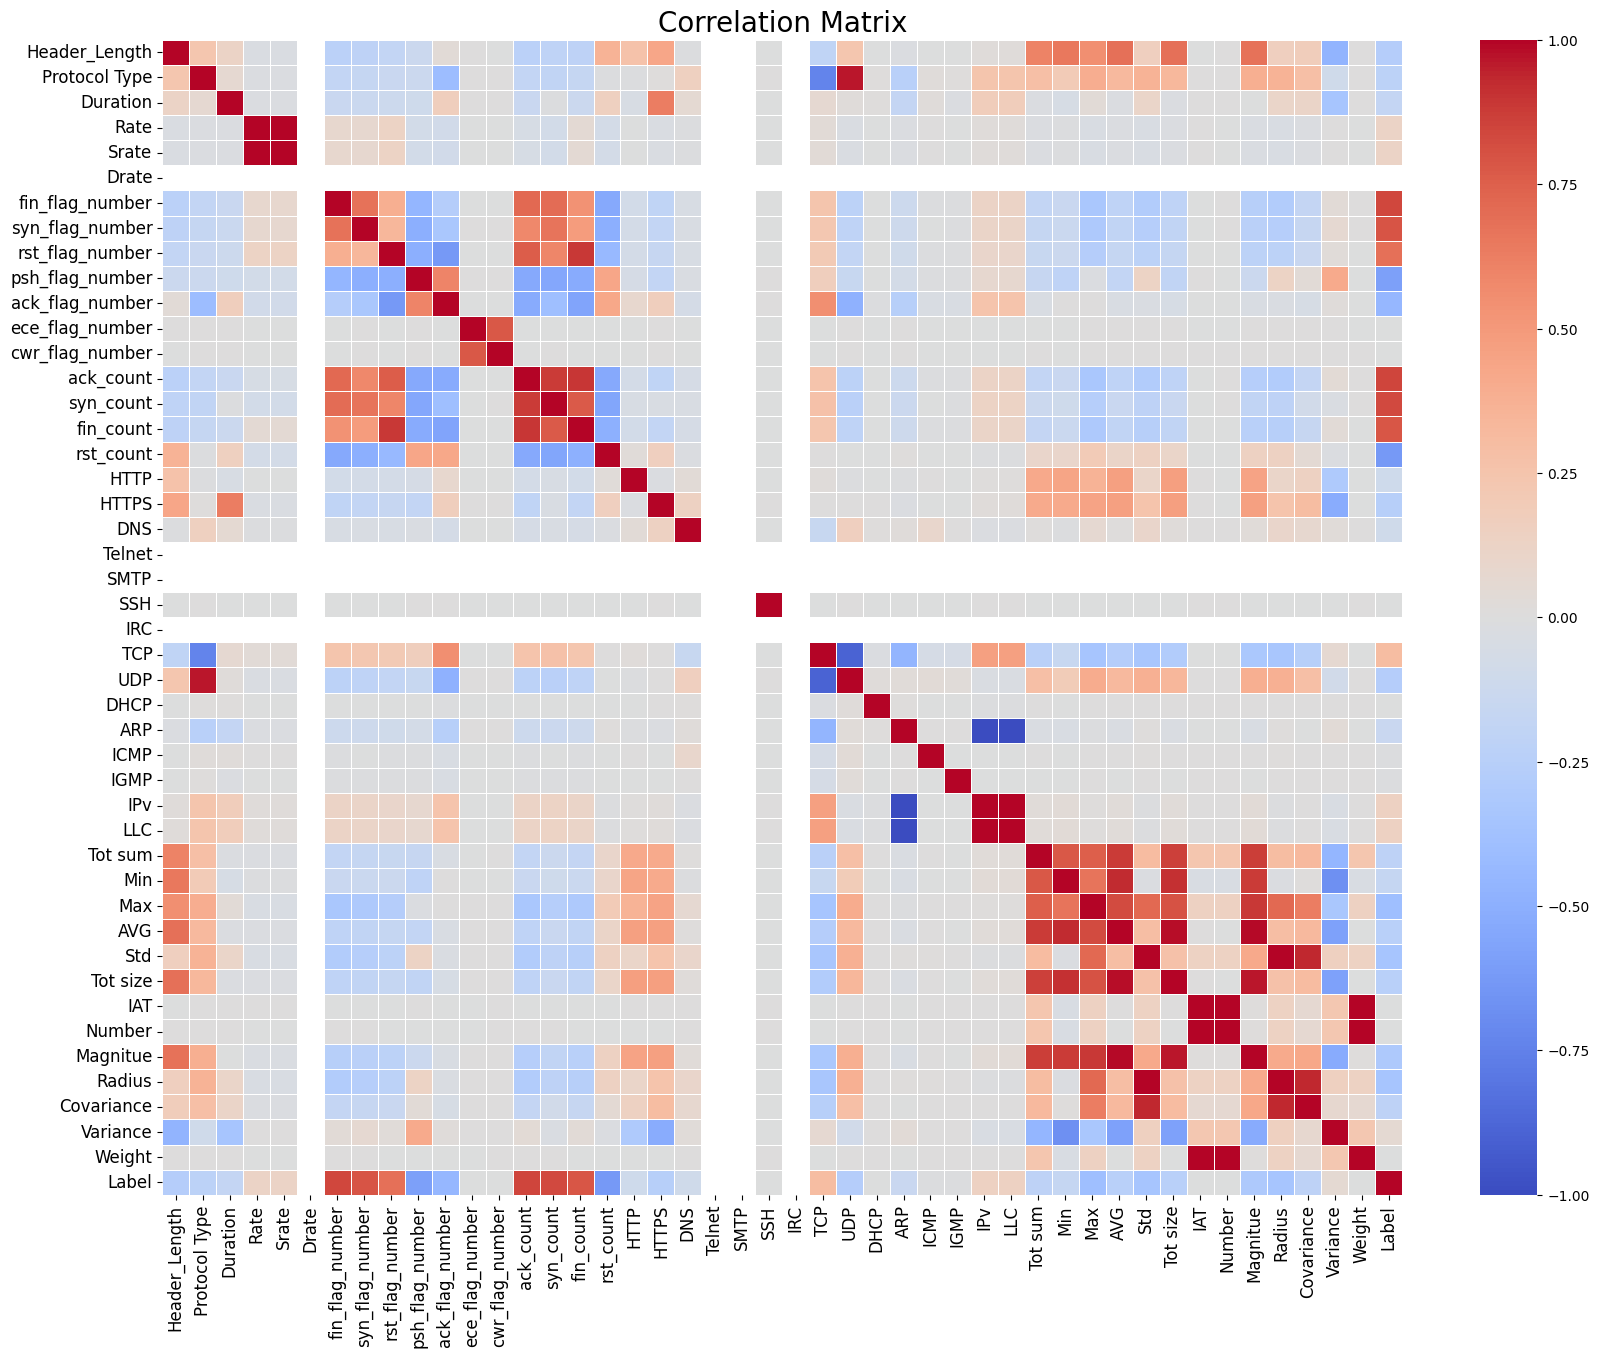

In [ ]:
# Creating an enhanced correlation matrix
# Calculating the correlation matrix for the combined dataset
correlation_matrix = combined_data.corr()

# Setting the figure size for better visibility
plt.figure(figsize=(20, 15))

# Plotting the heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', cbar=True, linewidths=0.5)

# Customizing the x-axis and y-axis ticks
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)

# Adding a title to the heatmap
plt.title("Correlation Matrix", fontsize=20)
plt.show()

In [ ]:
# Selecting features strongly correlated with the target label
# Extracting correlations of features with the 'Label' column
correlation_with_label = correlation_matrix['Label'].drop('Label')

# Selecting features with an absolute correlation value greater than 0.3
selected_features_corr = correlation_with_label[correlation_with_label.abs() > 0.3].index.tolist()

# Displaying the selected features
print("Selected Features:", selected_features_corr)

Selected Features: ['fin_flag_number', 'syn_flag_number', 'rst_flag_number', 'psh_flag_number', 'ack_flag_number', 'ack_count', 'syn_count', 'fin_count', 'rst_count', 'TCP', 'Max', 'Std', 'Magnitue', 'Radius']


In [ ]:
# Importing libraries for feature selection
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Splitting the dataset into features (X) and target labels (y)
# Removing the 'Label' column to retain only the features
X = combined_data.drop(columns=['Label'])
y = combined_data['Label']

# Scaling the feature values to the range [0, 1]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Using Chi-square test to select the top 14 features
chi2_selector = SelectKBest(chi2, k=14)
X_selected = chi2_selector.fit_transform(X_scaled, y)

# Getting the names of the selected features
selected_features_indices = chi2_selector.get_support(indices=True)
selected_features_chi2 = X.columns[selected_features_indices]

# Displaying the selected features using Chi-square
print("Selected Features:", selected_features_chi2)

Selected Features: Index(['fin_flag_number', 'syn_flag_number', 'rst_flag_number',
       'psh_flag_number', 'ack_count', 'syn_count', 'fin_count', 'rst_count',
       'HTTPS', 'UDP', 'Max', 'Std', 'Tot size', 'Radius'],
      dtype='object')


In [ ]:
# Importing additional libraries for feature selection
from sklearn.feature_selection import VarianceThreshold, f_classif

# Splitting the dataset into features (X) and target labels (y)
X = combined_data.drop(columns=['Label'])
y = combined_data['Label']

# Removing columns with constant values
constant_filter = VarianceThreshold(threshold=0)
X_filtered = constant_filter.fit_transform(X)

# Updating column names after filtering constant features
X = X.loc[:, constant_filter.get_support()]

# Using ANOVA F-test to select the top 14 features
selector = SelectKBest(f_classif, k=14)
X_selected = selector.fit_transform(X, y)

# Getting the names of the selected features using ANOVA
selected_features_indices = selector.get_support(indices=True)
selected_features_anova = X.columns[selected_features_indices]

# Displaying the selected features using ANOVA
print("Selected Features using ANOVA:", selected_features_anova)

Selected Features using ANOVA: Index(['fin_flag_number', 'syn_flag_number', 'rst_flag_number',
       'psh_flag_number', 'ack_flag_number', 'ack_count', 'syn_count',
       'fin_count', 'rst_count', 'TCP', 'Max', 'Std', 'Magnitue', 'Radius'],
      dtype='object')


In [ ]:
# Defining the three sets of selected features
features_corr = set(selected_features_corr)
features_chi2 = set(selected_features_chi2)
features_anova = set(selected_features_anova)

# Finding common features across all three methods
common_features = features_corr & features_chi2 & features_anova

# Displaying the common features
print("Common Features between all three methods:")
for feature in common_features:
    print(feature)

Common Features between all three methods:
syn_count
psh_flag_number
Radius
fin_flag_number
Std
rst_flag_number
syn_flag_number
ack_count
fin_count
Max
rst_count


In [ ]:
# Importing additional libraries for handling outliers
from sklearn.ensemble import IsolationForest
from scipy.stats import zscore

In [ ]:
# Identifying columns with constant values
constant_columns = combined_data.columns[(combined_data.nunique() <= 1)]

# Displaying columns with constant values
print("Columns with constant values:", constant_columns)

# Dropping columns with constant values from the dataset
combined_data = combined_data.drop(columns=constant_columns)

Columns with constant values: Index(['Drate', 'Telnet', 'SMTP', 'IRC'], dtype='object')


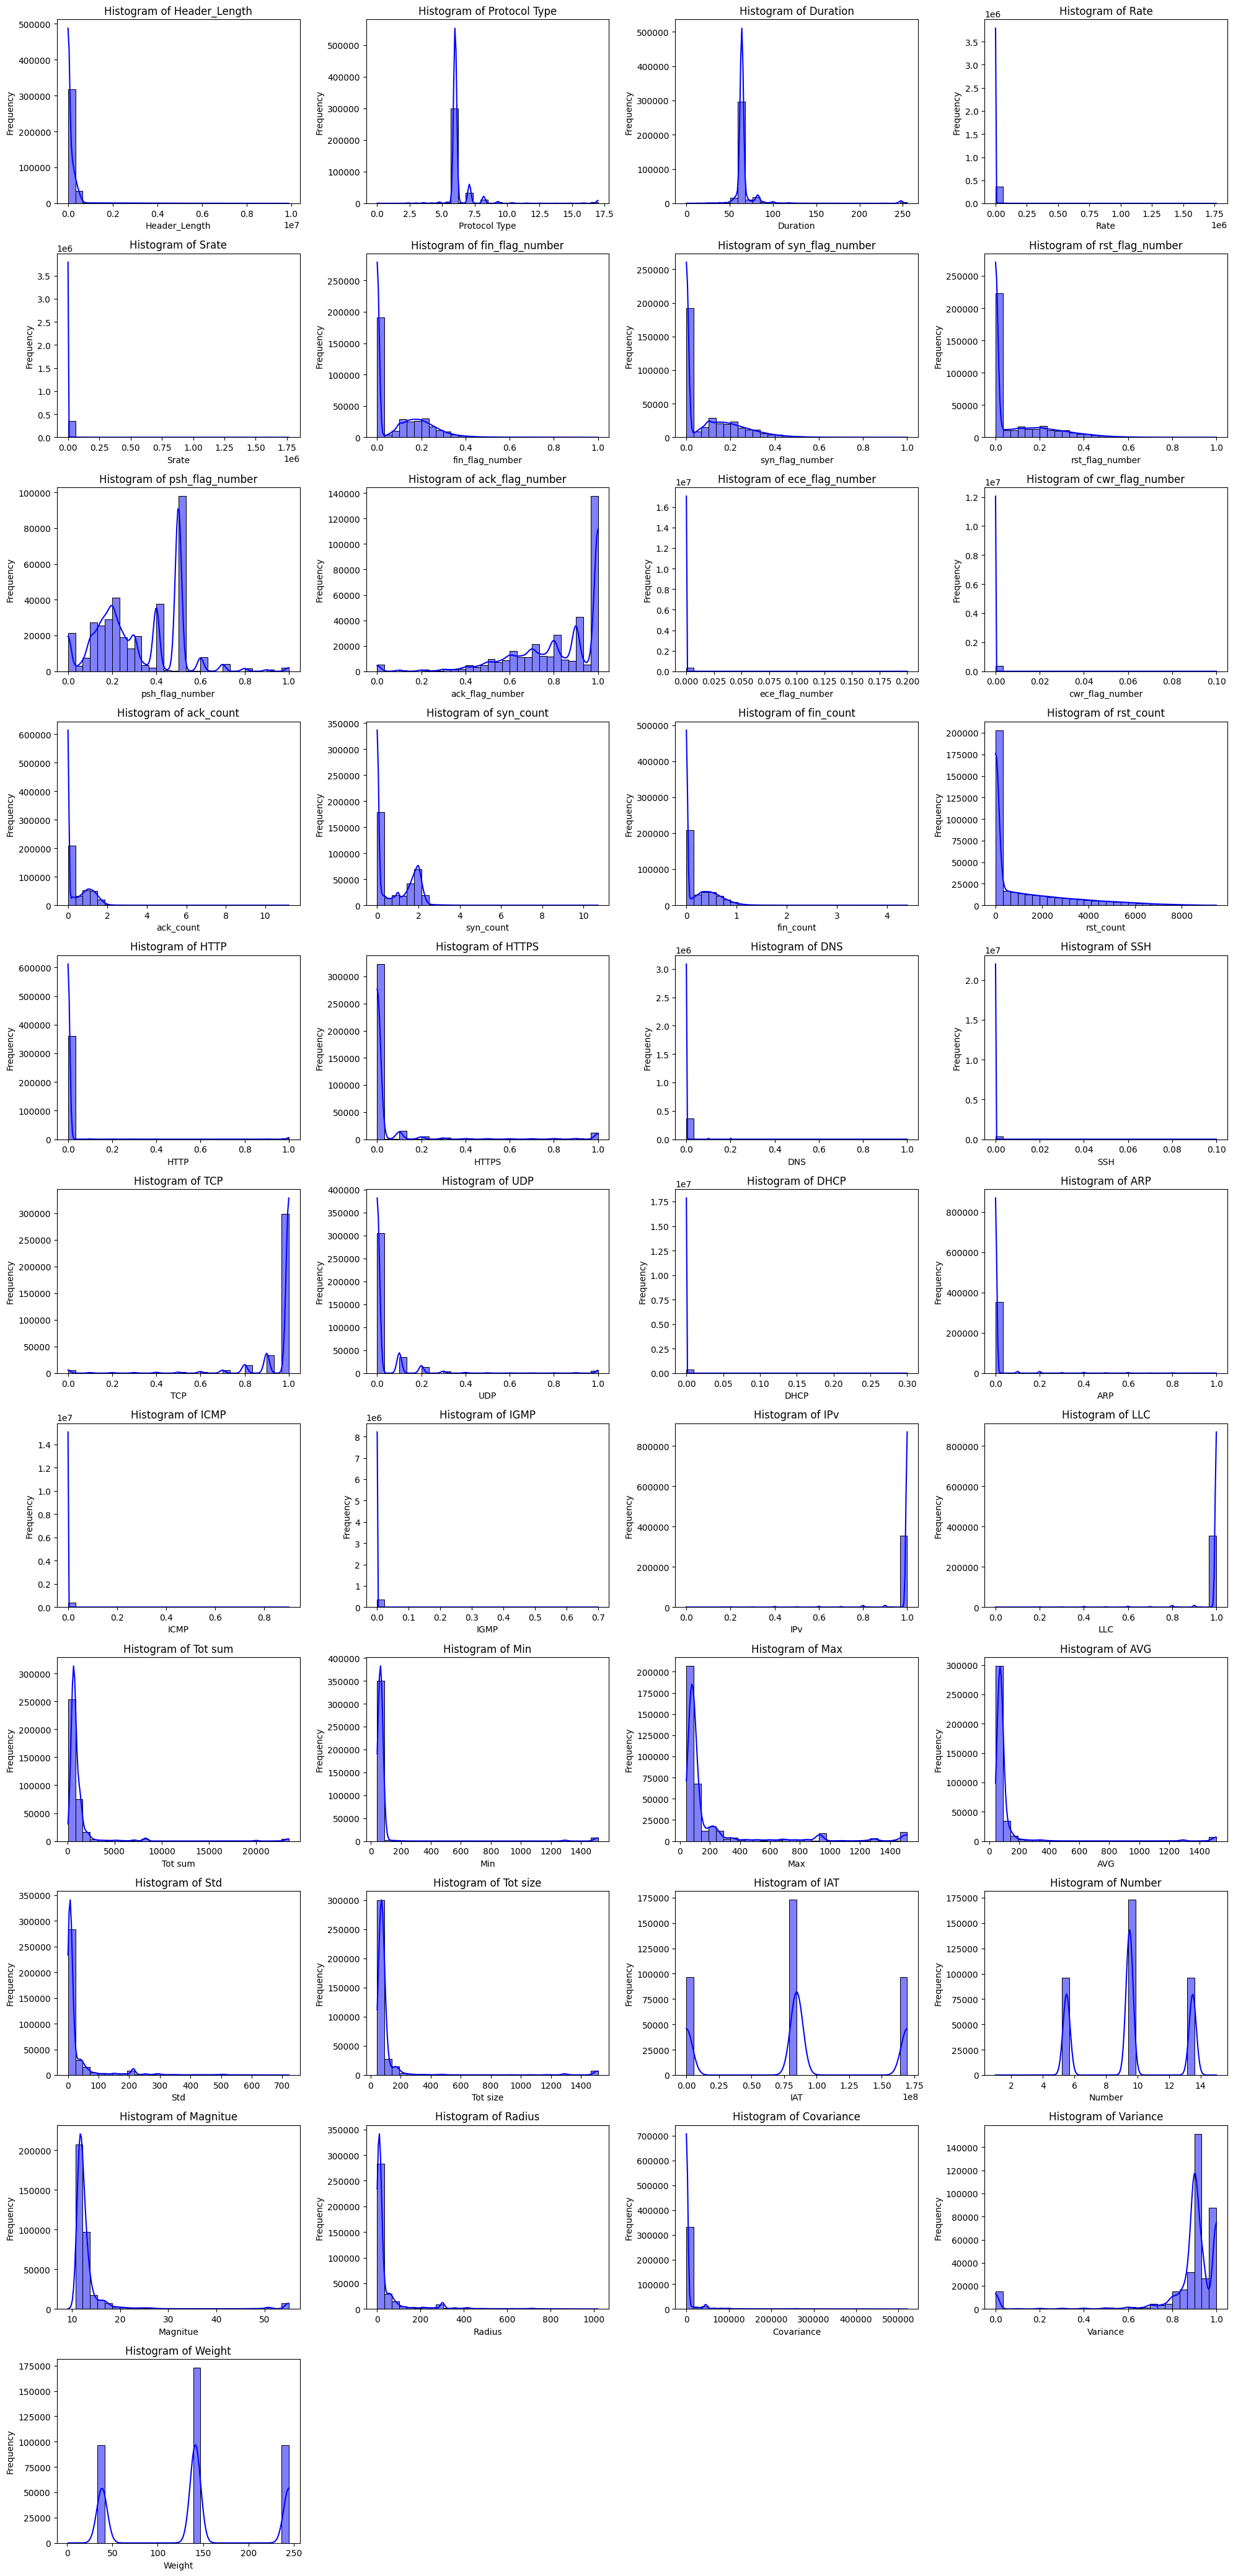

In [ ]:
# List of all features in the dataset
all_features = combined_data.columns.drop('Label')

# Plotting histograms for all features
plt.figure(figsize=(20, 45))
for i, feature in enumerate(all_features, 1):
    plt.subplot(12, 4, i)
    sns.histplot(combined_data[feature], kde=True, bins=30, color='blue')
    plt.title(f"Histogram of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

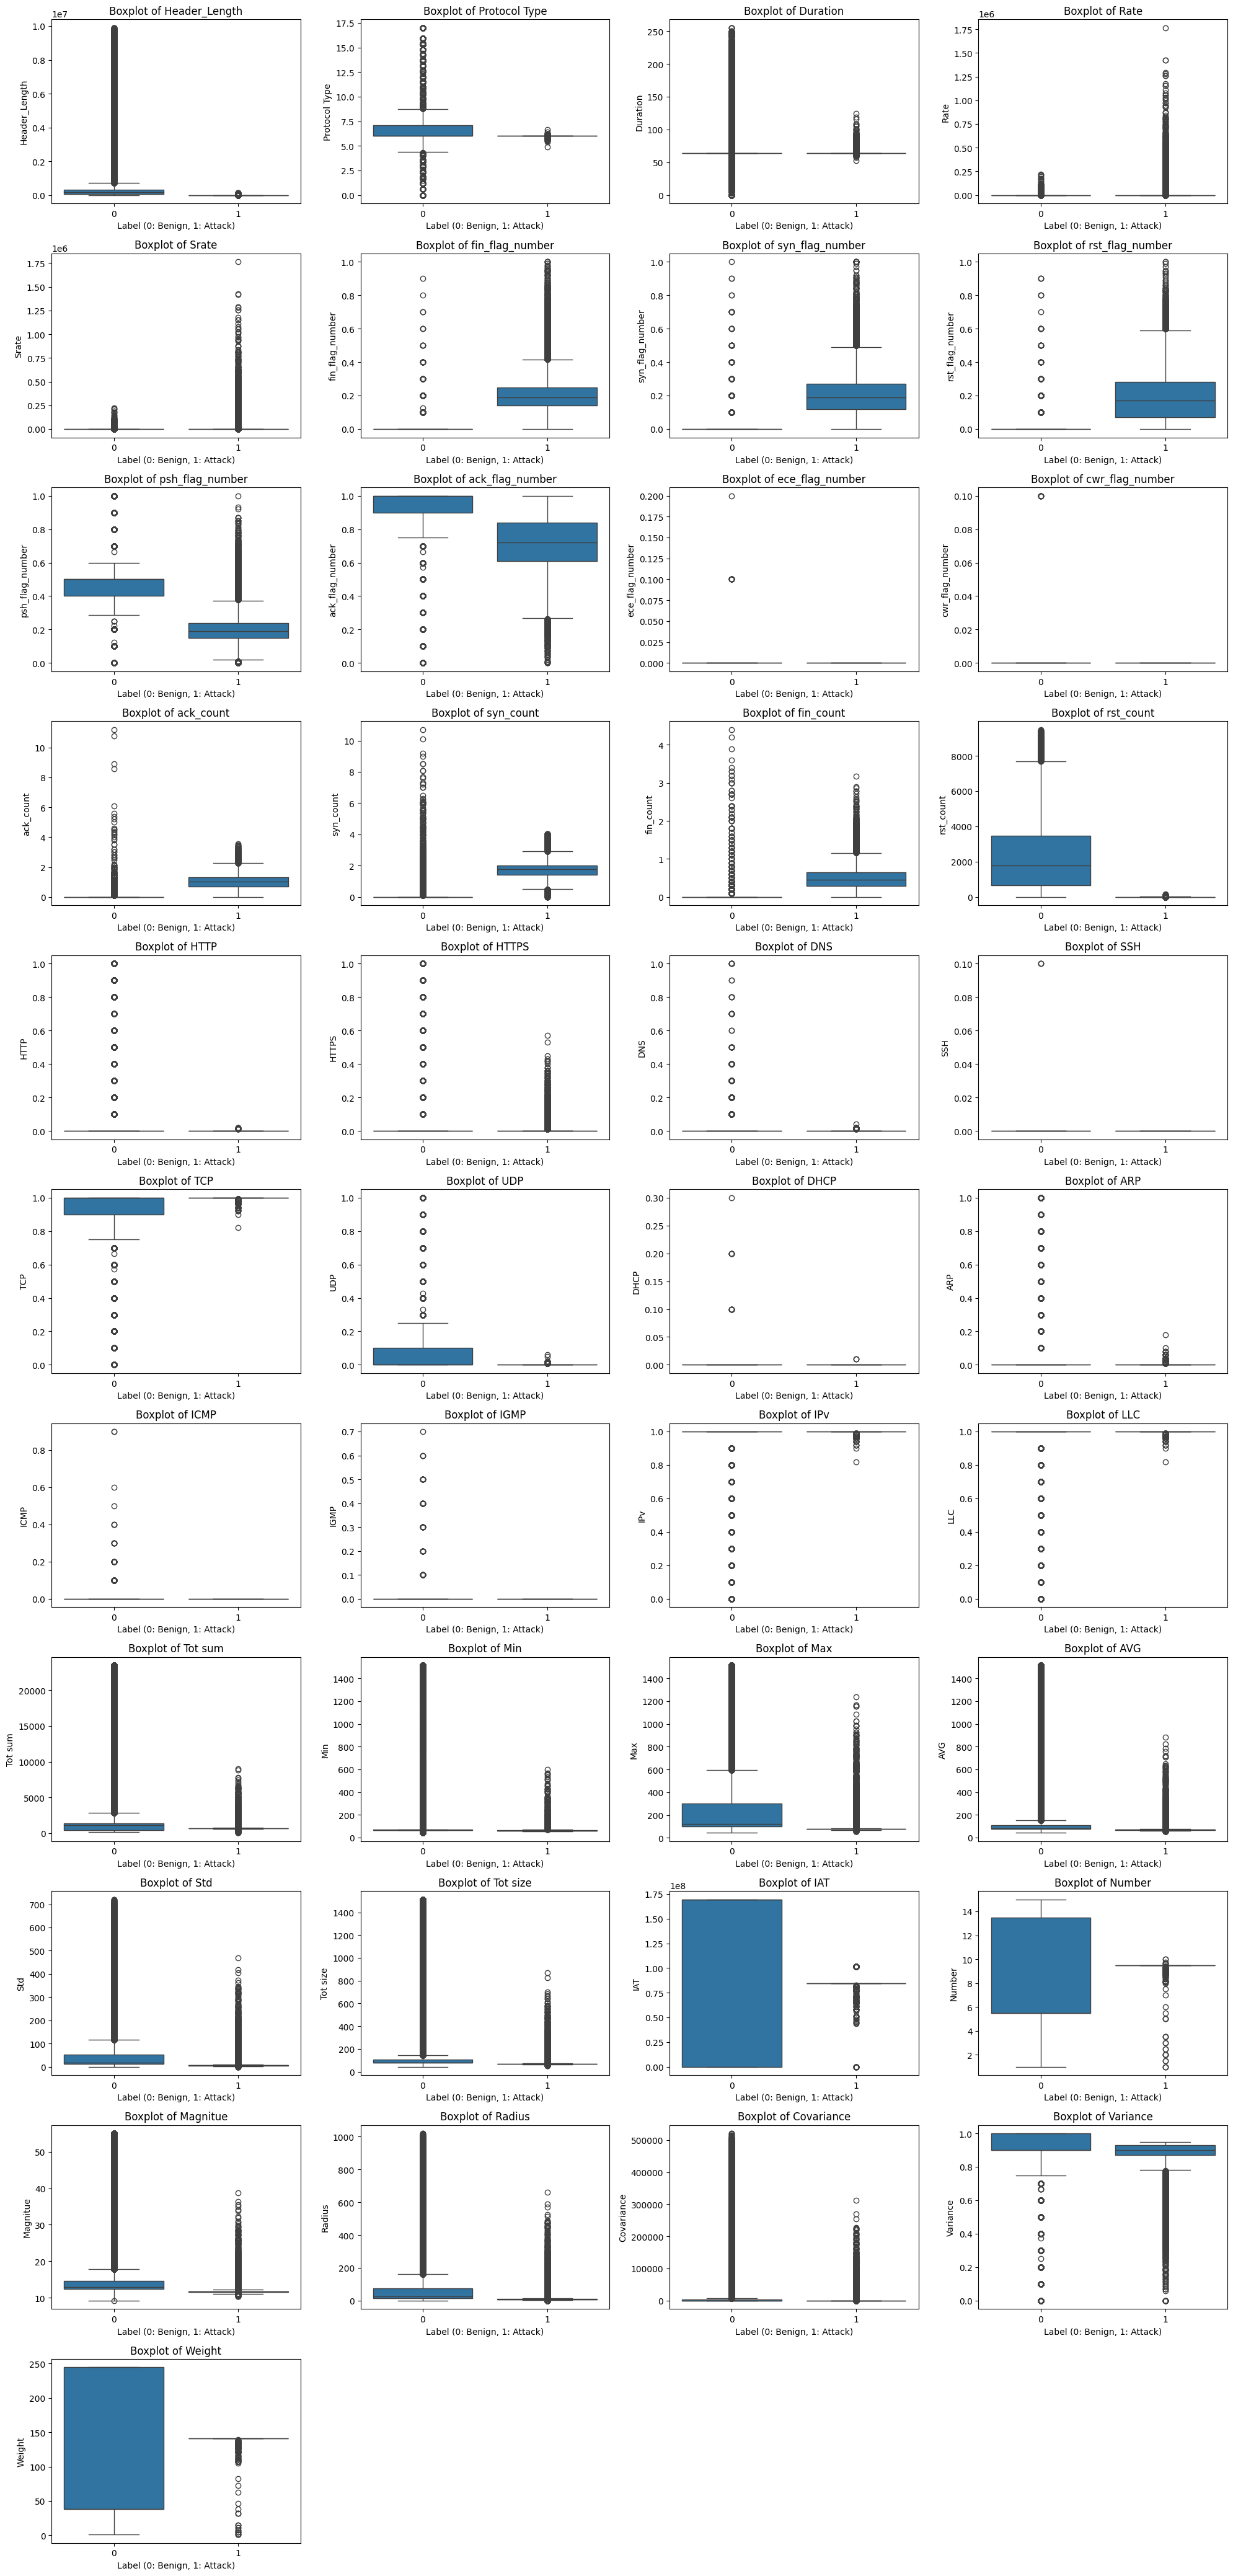

In [ ]:
# Plotting boxplots for all features grouped by Label
plt.figure(figsize=(20, 45))
for i, feature in enumerate(all_features, 1):
    plt.subplot(12, 4, i)
    sns.boxplot(x=combined_data['Label'], y=combined_data[feature])
    plt.title(f"Boxplot of {feature}")
    plt.xlabel("Label (0: Benign, 1: Attack)")
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

In [ ]:
# Detecting outliers using Z-Score
def detect_outliers_zscore(df, threshold=3):
    outliers = {}
    for column in df.select_dtypes(include=[np.number]).columns:
        z_scores = zscore(df[column])
        outliers[column] = (np.abs(z_scores) > threshold).sum()
    return outliers

zscore_outliers = detect_outliers_zscore(combined_data)
print("\nOutliers detected using Z-Score:")
print(zscore_outliers)


Outliers detected using Z-Score:
{'Header_Length': 7308, 'Protocol Type': 7626, 'Duration': 7485, 'Rate': 4500, 'Srate': 4500, 'fin_flag_number': 2975, 'syn_flag_number': 3346, 'rst_flag_number': 4858, 'psh_flag_number': 3020, 'ack_flag_number': 6398, 'ece_flag_number': 17, 'cwr_flag_number': 10, 'ack_count': 581, 'syn_count': 262, 'fin_count': 2761, 'rst_count': 6016, 'HTTP': 4342, 'HTTPS': 15691, 'DNS': 4442, 'SSH': 3, 'TCP': 9558, 'UDP': 7167, 'DHCP': 18, 'ARP': 5489, 'ICMP': 133, 'IGMP': 111, 'IPv': 5489, 'LLC': 5489, 'Tot sum': 6607, 'Min': 9748, 'Max': 16243, 'AVG': 12387, 'Std': 10049, 'Tot size': 12312, 'IAT': 0, 'Number': 0, 'Magnitue': 13013, 'Radius': 10047, 'Covariance': 7134, 'Variance': 16274, 'Weight': 0, 'Label': 0}


In [ ]:
# Function to detect outliers using the Interquartile Range (IQR) method
# This method identifies outliers as values lying outside 1.5 * IQR from the Q1 and Q3
def detect_outliers_iqr(df, multiplier=1.5):
    outliers = {}
    # Iterate over all numerical columns
    for column in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[column].quantile(0.25)  # Compute the first quartile
        Q3 = df[column].quantile(0.75)  # Compute the third quartile
        IQR = Q3 - Q1  # Compute the interquartile range
        lower_bound = Q1 - multiplier * IQR  # Calculate the lower bound
        upper_bound = Q3 + multiplier * IQR  # Calculate the upper bound
        # Count values outside the bounds
        outliers[column] = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()
    return outliers

# Apply IQR method to detect outliers
iqr_outliers = detect_outliers_iqr(combined_data)
print("\nOutliers detected using IQR:")
print(iqr_outliers)


Outliers detected using IQR:
{'Header_Length': 26793, 'Protocol Type': 68103, 'Duration': 83929, 'Rate': 49318, 'Srate': 49318, 'fin_flag_number': 2703, 'syn_flag_number': 4376, 'rst_flag_number': 14156, 'psh_flag_number': 2150, 'ack_flag_number': 7645, 'ece_flag_number': 17, 'cwr_flag_number': 10, 'ack_count': 240, 'syn_count': 76, 'fin_count': 3328, 'rst_count': 23463, 'HTTP': 5320, 'HTTPS': 44116, 'DNS': 4494, 'SSH': 3, 'TCP': 68104, 'UDP': 60859, 'DHCP': 18, 'ARP': 12665, 'ICMP': 133, 'IGMP': 111, 'IPv': 12665, 'LLC': 12665, 'Tot sum': 30433, 'Min': 28771, 'Max': 61638, 'AVG': 47100, 'Std': 65493, 'Tot size': 50433, 'IAT': 0, 'Number': 0, 'Magnitue': 45121, 'Radius': 65838, 'Covariance': 80613, 'Variance': 36162, 'Weight': 0, 'Label': 0}


In [ ]:
# Function to detect outliers using the Isolation Forest algorithm
# This method is based on an ensemble of trees to isolate anomalous data points
def detect_outliers_isolation_forest(df, contamination=0.01):
    numerical_data = df.select_dtypes(include=[np.number])  # Select numerical columns
    isolation_forest = IsolationForest(contamination=contamination, random_state=42)  # Initialize the model
    isolation_forest.fit(numerical_data)  # Fit the model to the data
    outliers = isolation_forest.predict(numerical_data)  # Predict anomalies
    return sum(outliers == -1)  # Count anomalies labeled as -1

# Apply Isolation Forest to detect outliers
isolation_forest_outliers = detect_outliers_isolation_forest(combined_data)
print("\nOutliers detected using Isolation Forest:")
print(isolation_forest_outliers)


Outliers detected using Isolation Forest:
3657


In [ ]:
# Compare the number of outliers detected by each method
# Create a summary table for Z-Score, IQR, and Isolation Forest results
outliers_comparison = pd.DataFrame({
    "Z-Score": zscore_outliers,
    "IQR": iqr_outliers,
    "Isolation Forest": isolation_forest_outliers
}).T
print("\nOutliers comparison across methods:")
print(outliers_comparison)


Outliers comparison across methods:
                  Header_Length  Protocol Type  Duration   Rate  Srate  \
Z-Score                    7308           7626      7485   4500   4500   
IQR                       26793          68103     83929  49318  49318   
Isolation Forest           3657           3657      3657   3657   3657   

                  fin_flag_number  syn_flag_number  rst_flag_number  \
Z-Score                      2975             3346             4858   
IQR                          2703             4376            14156   
Isolation Forest             3657             3657             3657   

                  psh_flag_number  ack_flag_number  ...    Std  Tot size  \
Z-Score                      3020             6398  ...  10049     12312   
IQR                          2150             7645  ...  65493     50433   
Isolation Forest             3657             3657  ...   3657      3657   

                   IAT  Number  Magnitue  Radius  Covariance  Variance  \
Z-

In [ ]:
# Identifying common outliers detected by all three methods
common_outliers = {}

# Iterate over each numerical column to find indices of common outliers
for column in combined_data.select_dtypes(include=[np.number]).columns:
    # Get indices of outliers detected by Z-Score
    zscore_outliers_indices = combined_data.index[np.abs(zscore(combined_data[column])) > 3].tolist()

    # Get indices of outliers detected by IQR
    Q1 = combined_data[column].quantile(0.25)
    Q3 = combined_data[column].quantile(0.75)
    IQR = Q3 - Q1
    iqr_outliers_indices = combined_data.index[
        (combined_data[column] < (Q1 - 1.5 * IQR)) | (combined_data[column] > (Q3 + 1.5 * IQR))
    ].tolist()

    # Get indices of outliers detected by Isolation Forest
    isolation_outliers_indices = combined_data.index[
        IsolationForest(contamination=0.01, random_state=42).fit_predict(combined_data[[column]]) == -1
    ].tolist()

    # Find common indices across the three methods
    common_outliers[column] = set(zscore_outliers_indices) & set(iqr_outliers_indices) & set(isolation_outliers_indices)

# Display common outliers for each numerical feature
print("\nCommon outliers for each feature across methods:")
for column, outliers in common_outliers.items():
    print(f"{column}: {len(outliers)} common outliers")

# Save the count of common outliers for reporting or analysis
common_outliers_count = {col: len(outliers) for col, outliers in common_outliers.items()}



Common outliers for each feature across methods:
Header_Length: 3428 common outliers
Protocol Type: 1933 common outliers
Duration: 2484 common outliers
Rate: 3654 common outliers
Srate: 3654 common outliers
fin_flag_number: 2703 common outliers
syn_flag_number: 3346 common outliers
rst_flag_number: 3280 common outliers
psh_flag_number: 2150 common outliers
ack_flag_number: 1029 common outliers
ece_flag_number: 17 common outliers
cwr_flag_number: 10 common outliers
ack_count: 240 common outliers
syn_count: 76 common outliers
fin_count: 2759 common outliers
rst_count: 3622 common outliers
HTTP: 3588 common outliers
HTTPS: 2360 common outliers
DNS: 2451 common outliers
SSH: 0 common outliers
TCP: 1937 common outliers
UDP: 2298 common outliers
DHCP: 15 common outliers
ARP: 2976 common outliers
ICMP: 133 common outliers
IGMP: 111 common outliers
IPv: 2976 common outliers
LLC: 2976 common outliers
Tot sum: 3653 common outliers
Min: 2569 common outliers
Max: 3615 common outliers
AVG: 2192 co

In [ ]:
# Calculate the mean and median for each numerical column
# This helps to evaluate the data distribution and identify skewness
for col in combined_data.select_dtypes(include=[np.number]).columns:
    mean_val = combined_data[col].mean()  # Compute the mean
    median_val = combined_data[col].median()  # Compute the median
    print(f"{col}: Mean={mean_val}, Median={median_val}, Difference={abs(mean_val - median_val)}")

Header_Length: Mean=220678.01864332941, Median=10379.18, Difference=210298.83864332942
Protocol Type: Mean=6.362730730217404, Median=6.0, Difference=0.3627307302174039
Duration: Mean=68.63549983912954, Median=64.0, Difference=4.635499839129537
Rate: Mean=3383.5601053457985, Median=8.064929484568268, Difference=3375.49517586123
Srate: Mean=3383.5601053457985, Median=8.064929484568268, Difference=3375.49517586123
fin_flag_number: Mean=0.09484095383751814, Median=0.0, Difference=0.09484095383751814
syn_flag_number: Mean=0.09659767869570313, Median=0.0, Difference=0.09659767869570313
rst_flag_number: Mean=0.08951081341879015, Median=0.0, Difference=0.08951081341879015
psh_flag_number: Mean=0.31337152282943187, Median=0.28, Difference=0.03337152282943184
ack_flag_number: Mean=0.8161526062919078, Median=0.9, Difference=0.08384739370809224
ece_flag_number: Mean=4.921152205769778e-06, Median=0.0, Difference=4.921152205769778e-06
cwr_flag_number: Mean=2.7339734476498766e-06, Median=0.0, Differe

In [ ]:
# Create a new copy of the dataset without outliers
# This ensures we work with a clean version of the data
filtered_data = combined_data.copy()

# Collect all indices of outliers
# Use a set to aggregate unique indices from all detected outliers
all_outliers_indices = set()
for column, outliers in common_outliers.items():
    all_outliers_indices.update(outliers)  # Add all indices to the set

# Convert the set to a list before removing rows
all_outliers_indices = list(all_outliers_indices)

# Drop rows with outlier values
# Removing rows based on indices ensures the dataset is free from anomalies
filtered_data = filtered_data.drop(index=all_outliers_indices)

# Print the size of the data after removing outliers
# This shows the number of rows before and after cleaning
print(f"Original data size: {combined_data.shape}")
print(f"Filtered data size: {filtered_data.shape}")


Original data size: (365768, 42)
Filtered data size: (285734, 42)


In [ ]:
# Print the number of rows removed
# The difference between the original and filtered dataset sizes
print(f"Number of rows removed: {combined_data.shape[0] - filtered_data.shape[0]}")

Number of rows removed: 80034


In [ ]:
# Perform Anderson-Darling test on benign dataset columns
# This test checks if the data follows a normal distribution
from scipy.stats import anderson

for column in benign_data.select_dtypes(include=[np.number]).columns:
    result = anderson(benign_data[column])
    print(f"{column}: Test Statistic = {result.statistic}, Critical Values = {result.critical_values}")

    # Compare the test statistic to the critical value at 5% significance level
    critical_value = result.critical_values[2]  # 5% significance level
    if result.statistic < critical_value:
        print(f"  --> {column} follows normal distribution (Test Statistic < Critical Value at 5%)")
    else:
        print(f"  --> {column} does NOT follow normal distribution (Test Statistic >= Critical Value at 5%)")


Header_Length: Test Statistic = 43246.823986639734, Critical Values = [0.576 0.656 0.787 0.918 1.092]
  --> Header_Length does NOT follow normal distribution (Test Statistic >= Critical Value at 5%)
Protocol Type: Test Statistic = 33488.90679499842, Critical Values = [0.576 0.656 0.787 0.918 1.092]
  --> Protocol Type does NOT follow normal distribution (Test Statistic >= Critical Value at 5%)
Duration: Test Statistic = 38735.92135478303, Critical Values = [0.576 0.656 0.787 0.918 1.092]
  --> Duration does NOT follow normal distribution (Test Statistic >= Critical Value at 5%)
Rate: Test Statistic = 66167.29155802846, Critical Values = [0.576 0.656 0.787 0.918 1.092]
  --> Rate does NOT follow normal distribution (Test Statistic >= Critical Value at 5%)
Srate: Test Statistic = 66167.29155802846, Critical Values = [0.576 0.656 0.787 0.918 1.092]
  --> Srate does NOT follow normal distribution (Test Statistic >= Critical Value at 5%)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:2248: RuntimeWarning: invalid value encountered in divide
  w = (y - xbar) / s


Drate: Test Statistic = nan, Critical Values = [0.576 0.656 0.787 0.918 1.092]
  --> Drate does NOT follow normal distribution (Test Statistic >= Critical Value at 5%)
fin_flag_number: Test Statistic = 72153.45728276181, Critical Values = [0.576 0.656 0.787 0.918 1.092]
  --> fin_flag_number does NOT follow normal distribution (Test Statistic >= Critical Value at 5%)
syn_flag_number: Test Statistic = 71703.8813234794, Critical Values = [0.576 0.656 0.787 0.918 1.092]
  --> syn_flag_number does NOT follow normal distribution (Test Statistic >= Critical Value at 5%)
rst_flag_number: Test Statistic = 73627.06555231649, Critical Values = [0.576 0.656 0.787 0.918 1.092]
  --> rst_flag_number does NOT follow normal distribution (Test Statistic >= Critical Value at 5%)
psh_flag_number: Test Statistic = 17210.404963059875, Critical Values = [0.576 0.656 0.787 0.918 1.092]
  --> psh_flag_number does NOT follow normal distribution (Test Statistic >= Critical Value at 5%)
ack_flag_number: Test St

In [ ]:
# Perform Anderson-Darling test on attack dataset columns
for column in attack_data.select_dtypes(include=[np.number]).columns:
    result = anderson(attack_data[column])
    print(f"{column}: Test Statistic = {result.statistic}, Critical Values = {result.critical_values}")

    # Compare the test statistic to the critical value at 5% significance level
    critical_value = result.critical_values[2]  # 5% significance level
    if result.statistic < critical_value:
        print(f"  --> {column} follows normal distribution (Test Statistic < Critical Value at 5%)")
    else:
        print(f"  --> {column} does NOT follow normal distribution (Test Statistic >= Critical Value at 5%)")

Header_Length: Test Statistic = 56463.2614578706, Critical Values = [0.576 0.656 0.787 0.918 1.092]
  --> Header_Length does NOT follow normal distribution (Test Statistic >= Critical Value at 5%)
Protocol Type: Test Statistic = 66173.38884398033, Critical Values = [0.576 0.656 0.787 0.918 1.092]
  --> Protocol Type does NOT follow normal distribution (Test Statistic >= Critical Value at 5%)
Duration: Test Statistic = 65237.1652115068, Critical Values = [0.576 0.656 0.787 0.918 1.092]
  --> Duration does NOT follow normal distribution (Test Statistic >= Critical Value at 5%)
Rate: Test Statistic = 56971.66552115342, Critical Values = [0.576 0.656 0.787 0.918 1.092]
  --> Rate does NOT follow normal distribution (Test Statistic >= Critical Value at 5%)
Srate: Test Statistic = 56971.66552115342, Critical Values = [0.576 0.656 0.787 0.918 1.092]
  --> Srate does NOT follow normal distribution (Test Statistic >= Critical Value at 5%)
Drate: Test Statistic = nan, Critical Values = [0.576 0.

In [ ]:
# Perform Anderson-Darling test on the combined dataset columns
for column in combined_data.select_dtypes(include=[np.number]).columns:
    result = anderson(combined_data[column])
    print(f"{column}: Test Statistic = {result.statistic}, Critical Values = {result.critical_values}")

    # Compare the test statistic to the critical value at 5% significance level
    critical_value = result.critical_values[2]  # 5% significance level
    if result.statistic < critical_value:
        print(f"  --> {column} follows normal distribution (Test Statistic < Critical Value at 5%)")
    else:
        print(f"  --> {column} does NOT follow normal distribution (Test Statistic >= Critical Value at 5%)")


Header_Length: Test Statistic = 88455.54558303847, Critical Values = [0.576 0.656 0.787 0.918 1.092]
  --> Header_Length does NOT follow normal distribution (Test Statistic >= Critical Value at 5%)
Protocol Type: Test Statistic = 88774.24419660709, Critical Values = [0.576 0.656 0.787 0.918 1.092]
  --> Protocol Type does NOT follow normal distribution (Test Statistic >= Critical Value at 5%)
Duration: Test Statistic = 95267.14213954407, Critical Values = [0.576 0.656 0.787 0.918 1.092]
  --> Duration does NOT follow normal distribution (Test Statistic >= Critical Value at 5%)
Rate: Test Statistic = 128819.37511084013, Critical Values = [0.576 0.656 0.787 0.918 1.092]
  --> Rate does NOT follow normal distribution (Test Statistic >= Critical Value at 5%)
Srate: Test Statistic = 128819.37511084013, Critical Values = [0.576 0.656 0.787 0.918 1.092]
  --> Srate does NOT follow normal distribution (Test Statistic >= Critical Value at 5%)
fin_flag_number: Test Statistic = 29354.755908747087

In [ ]:
# Perform Anderson-Darling test on filtered dataset columns
for column in filtered_data.select_dtypes(include=[np.number]).columns:
    result = anderson(filtered_data[column])
    print(f"{column}: Test Statistic = {result.statistic}, Critical Values = {result.critical_values}")

    # Compare the test statistic to the critical value at 5% significance level
    critical_value = result.critical_values[2]  # 5% significance level
    if result.statistic < critical_value:
        print(f"  --> {column} follows normal distribution (Test Statistic < Critical Value at 5%)")
    else:
        print(f"  --> {column} does NOT follow normal distribution (Test Statistic >= Critical Value at 5%)")


Header_Length: Test Statistic = 41224.863701311, Critical Values = [0.576 0.656 0.787 0.918 1.092]
  --> Header_Length does NOT follow normal distribution (Test Statistic >= Critical Value at 5%)
Protocol Type: Test Statistic = 66139.99173636461, Critical Values = [0.576 0.656 0.787 0.918 1.092]
  --> Protocol Type does NOT follow normal distribution (Test Statistic >= Critical Value at 5%)
Duration: Test Statistic = 76332.63543734897, Critical Values = [0.576 0.656 0.787 0.918 1.092]
  --> Duration does NOT follow normal distribution (Test Statistic >= Critical Value at 5%)
Rate: Test Statistic = 102735.70974117302, Critical Values = [0.576 0.656 0.787 0.918 1.092]
  --> Rate does NOT follow normal distribution (Test Statistic >= Critical Value at 5%)
Srate: Test Statistic = 102735.70974117302, Critical Values = [0.576 0.656 0.787 0.918 1.092]
  --> Srate does NOT follow normal distribution (Test Statistic >= Critical Value at 5%)
fin_flag_number: Test Statistic = 24556.569805192295, 

In [ ]:
# Trying to Normalize non-normal distributions using Box-Cox or Yeo-Johnson transformations
from scipy.stats import boxcox, yeojohnson, normaltest

# Create a copy of the filtered dataset for transformations
normalized_data = filtered_data.copy()

for column in filtered_data.columns:
    try:
        # Check if the column does NOT follow a normal distribution
        stat, p_value = normaltest(filtered_data[column])
        if p_value < 0.05:  # If data does not follow normal distribution
            print(f"Transforming column: {column}")

            # Check if Box-Cox transformation can be applied (values must be > 0)
            if (filtered_data[column] > 0).all():
                # Apply Box-Cox transformation
                normalized_data[column], _ = boxcox(filtered_data[column] + 1e-6)  # Avoid zero values
            else:
                # Apply Yeo-Johnson transformation for columns with zero or negative values
                normalized_data[column], _ = yeojohnson(filtered_data[column])
        else:
            print(f"Column {column} already follows normal distribution.")
    except Exception as e:
        print(f"Error processing column {column}: {e}")

Transforming column: Header_Length
Transforming column: Protocol Type
Transforming column: Duration
Transforming column: Rate
Transforming column: Srate
Transforming column: fin_flag_number
Transforming column: syn_flag_number
Transforming column: rst_flag_number
Transforming column: psh_flag_number
Transforming column: ack_flag_number
Column ece_flag_number already follows normal distribution.
Column cwr_flag_number already follows normal distribution.
Transforming column: ack_count
Transforming column: syn_count
Transforming column: fin_count
Transforming column: rst_count
Transforming column: HTTP
Transforming column: HTTPS
Transforming column: DNS
Transforming column: SSH
Transforming column: TCP
Transforming column: UDP
Transforming column: DHCP
Transforming column: ARP
Column ICMP already follows normal distribution.
Column IGMP already follows normal distribution.
Transforming column: IPv
Transforming column: LLC
Transforming column: Tot sum
Transforming column: Min
Transforming

In [ ]:
# Recheck normality after transformation
for column in normalized_data.columns:
    try:
        # Check if the column follows a normal distribution after transformation
        stat, p_value = normaltest(normalized_data[column])
        if p_value < 0.05:  # If data does not follow normal distribution
            print(f"Column {column} still does NOT follow normal distribution (p-value: {p_value:.4f}).")
        else:
            print(f"Column {column} follows normal distribution (p-value: {p_value:.4f}).")
    except Exception as e:
        print(f"Error processing column {column}: {e}")

Column Header_Length still does NOT follow normal distribution (p-value: 0.0000).
Column Protocol Type still does NOT follow normal distribution (p-value: 0.0000).
Column Duration still does NOT follow normal distribution (p-value: 0.0000).
Column Rate still does NOT follow normal distribution (p-value: 0.0000).
Column Srate still does NOT follow normal distribution (p-value: 0.0000).
Column fin_flag_number still does NOT follow normal distribution (p-value: 0.0000).
Column syn_flag_number still does NOT follow normal distribution (p-value: 0.0000).
Column rst_flag_number still does NOT follow normal distribution (p-value: 0.0000).
Column psh_flag_number still does NOT follow normal distribution (p-value: 0.0000).
Column ack_flag_number still does NOT follow normal distribution (p-value: 0.0000).
Column ece_flag_number follows normal distribution (p-value: nan).
Column cwr_flag_number follows normal distribution (p-value: nan).
Column ack_count still does NOT follow normal distribution

In [ ]:

# Perform Anderson-Darling test after transformation
for column in normalized_data.columns:
    try:
        # Check if the column follows a normal distribution using Anderson-Darling
        result = anderson(normalized_data[column], dist='norm')
        stat = result.statistic
        critical_values = result.critical_values
        significance_levels = result.significance_level

        print(f"Column: {column}")
        print(f"Test Statistic: {stat:.4f}")
        for sl, cv in zip(significance_levels, critical_values):
            if stat < cv:
                print(f"At {sl:.1f}% level, data follows normal distribution (critical value: {cv:.4f}).")
            else:
                print(f"At {sl:.1f}% level, data does NOT follow normal distribution (critical value: {cv:.4f}).")
        print("-" * 50)
    except Exception as e:
        print(f"Error processing column {column}: {e}")


Column: Header_Length
Test Statistic: 23262.8247
At 15.0% level, data does NOT follow normal distribution (critical value: 0.5760).
At 10.0% level, data does NOT follow normal distribution (critical value: 0.6560).
At 5.0% level, data does NOT follow normal distribution (critical value: 0.7870).
At 2.5% level, data does NOT follow normal distribution (critical value: 0.9180).
At 1.0% level, data does NOT follow normal distribution (critical value: 1.0920).
--------------------------------------------------
Column: Protocol Type
Test Statistic: 62834.8569
At 15.0% level, data does NOT follow normal distribution (critical value: 0.5760).
At 10.0% level, data does NOT follow normal distribution (critical value: 0.6560).
At 5.0% level, data does NOT follow normal distribution (critical value: 0.7870).
At 2.5% level, data does NOT follow normal distribution (critical value: 0.9180).
At 1.0% level, data does NOT follow normal distribution (critical value: 1.0920).
---------------------------

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Split the dataset into features and labels
X2 = combined_data.drop(columns=['Label'])
y2= combined_data['Label']

# Step 1: Split the data into training (70%) and temporary (30%) sets
X_train2, X_temp2, y_train2, y_temp2 = train_test_split(X2, y2, test_size=0.3, random_state=42)

# Step 2: Split the temporary set into validation (50%) and testing (50%) sets
X_val, X_test2, y_val, y_test2 = train_test_split(X_temp2, y_temp2, test_size=0.5, random_state=42)

# Train a Random Forest model on the training set
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train2, y_train2)

# Evaluate on the validation set
y_pred_val = rf_model.predict(X_val)
print("Random Forest Validation Classification Report:")
print(classification_report(y_val, y_pred_val))

# Evaluate on the testing set (final performance)
y_pred_test = rf_model.predict(X_test2)
print("Random Forest Testing Classification Report:")
print(classification_report(y_test2, y_pred_test))

# Train a Gradient Boosting model on the training set
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train2, y_train2)

# Evaluate on the validation set
y_pred_val_gb = gb_model.predict(X_val)
print("Gradient Boosting Validation Classification Report:")
print(classification_report(y_val, y_pred_val_gb))

# Evaluate on the testing set (final performance)
y_pred_test_gb = gb_model.predict(X_test2)
print("Gradient Boosting Testing Classification Report:")
print(classification_report(y_test2, y_pred_test_gb))


Random Forest Validation Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28905
           1       1.00      1.00      1.00     25960

    accuracy                           1.00     54865
   macro avg       1.00      1.00      1.00     54865
weighted avg       1.00      1.00      1.00     54865

Random Forest Testing Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28870
           1       1.00      1.00      1.00     25996

    accuracy                           1.00     54866
   macro avg       1.00      1.00      1.00     54866
weighted avg       1.00      1.00      1.00     54866

Gradient Boosting Validation Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28905
           1       1.00      1.00      1.00     25960

    accuracy                         

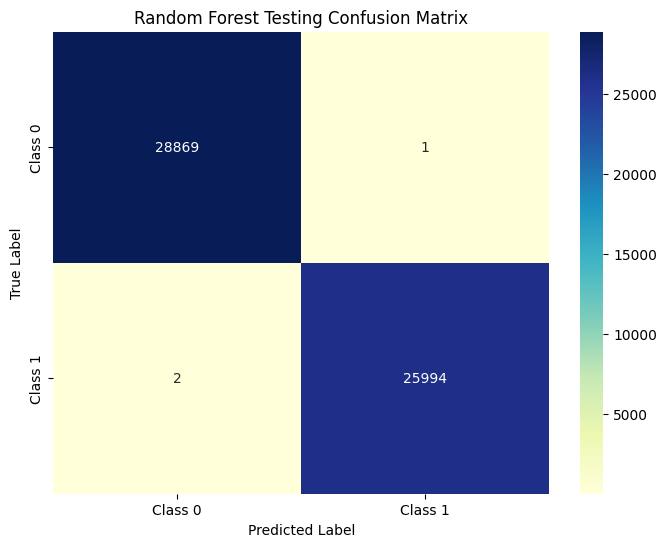

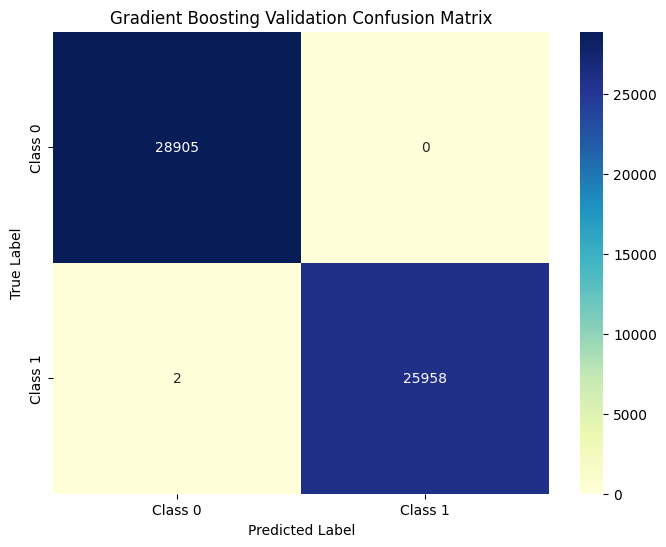

In [ ]:
# Function to plot Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Example: For Random Forest Testing Set
plot_confusion_matrix(y_test2, y_pred_test, "Random Forest Testing Confusion Matrix")

# Example: For Gradient Boosting Validation Set
plot_confusion_matrix(y_val, y_pred_val_gb, "Gradient Boosting Validation Confusion Matrix")


In [ ]:
# Train models on the original dataset
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Split the dataset into features and labels
X = combined_data.drop(columns=['Label'])
y = combined_data['Label']

# Split the data into training and testing sets
# The test set comprises 20% of the original data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the Random Forest model
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Train a Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Evaluate the Gradient Boosting model
y_pred_gb = gb_model.predict(X_test)
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     38678
           1       1.00      1.00      1.00     34476

    accuracy                           1.00     73154
   macro avg       1.00      1.00      1.00     73154
weighted avg       1.00      1.00      1.00     73154

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     38678
           1       1.00      1.00      1.00     34476

    accuracy                           1.00     73154
   macro avg       1.00      1.00      1.00     73154
weighted avg       1.00      1.00      1.00     73154



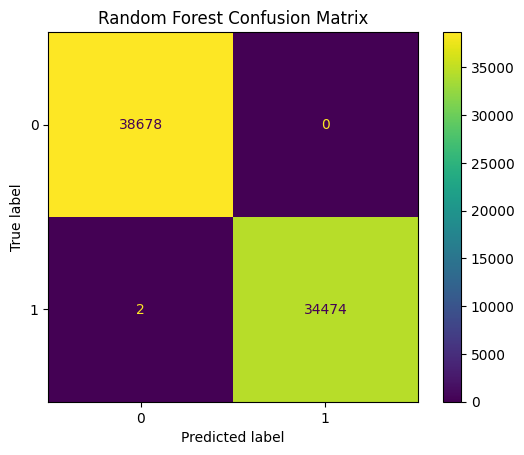

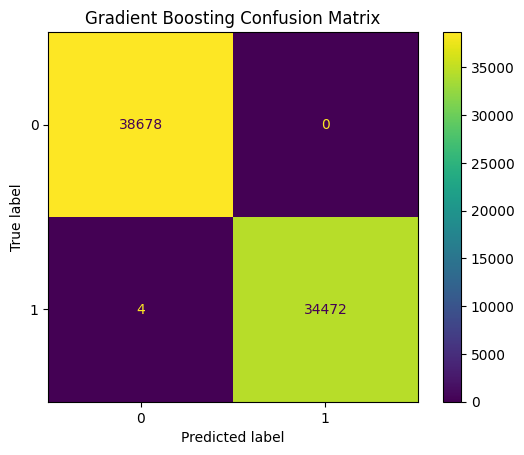

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test)
plt.title("Random Forest Confusion Matrix")
plt.show()

ConfusionMatrixDisplay.from_estimator(gb_model, X_test, y_test)
plt.title("Gradient Boosting Confusion Matrix")
plt.show()


In [ ]:
# Train models on the original dataset
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Create a new dataset with only the common features
X3 = combined_data[list(common_features)]
y3 = combined_data['Label']

# Split the data into training and testing sets
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=42)

# Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train3, y_train3)

# Evaluate the Random Forest model
y_pred_rf3 = rf_model.predict(X_test3)
print("\nRandom Forest Classification Report:")
print(classification_report(y_test3, y_pred_rf3))

# Train a Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train3, y_train3)

# Evaluate the Gradient Boosting model
y_pred_gb3 = gb_model.predict(X_test3)
print("\nGradient Boosting Classification Report:")
print(classification_report(y_test3, y_pred_gb3))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     38678
           1       1.00      1.00      1.00     34476

    accuracy                           1.00     73154
   macro avg       1.00      1.00      1.00     73154
weighted avg       1.00      1.00      1.00     73154


Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     38678
           1       1.00      1.00      1.00     34476

    accuracy                           1.00     73154
   macro avg       1.00      1.00      1.00     73154
weighted avg       1.00      1.00      1.00     73154



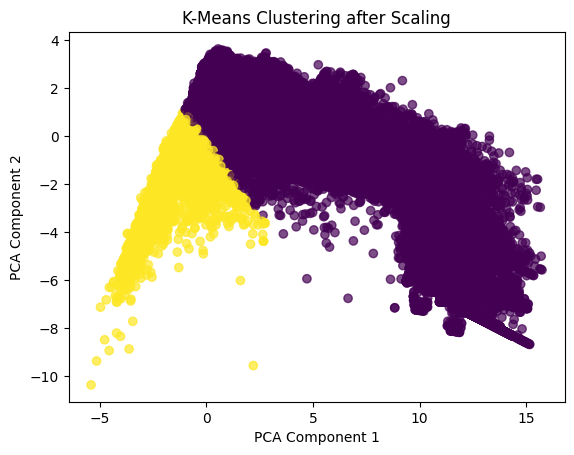

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Normalize (or scale) the data
scaler = StandardScaler()  
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Train a K-Means clustering model
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_pca)

# Visualize the clustering results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.7)
plt.title("K-Means Clustering after Scaling")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Map cluster labels to the actual labels (optional)
y_pred = kmeans.labels_

# Compare with actual labels (assuming you have 'y' as the true labels)
accuracy = accuracy_score(y, y_pred)
conf_matrix = confusion_matrix(y, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.998001465409768
Confusion Matrix:
 [[192394    338]
 [   393 172643]]


<ipython-input-38-d0d1b04336a4>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X2['Anomaly'] = anomaly_labels  # Add results to the dataset


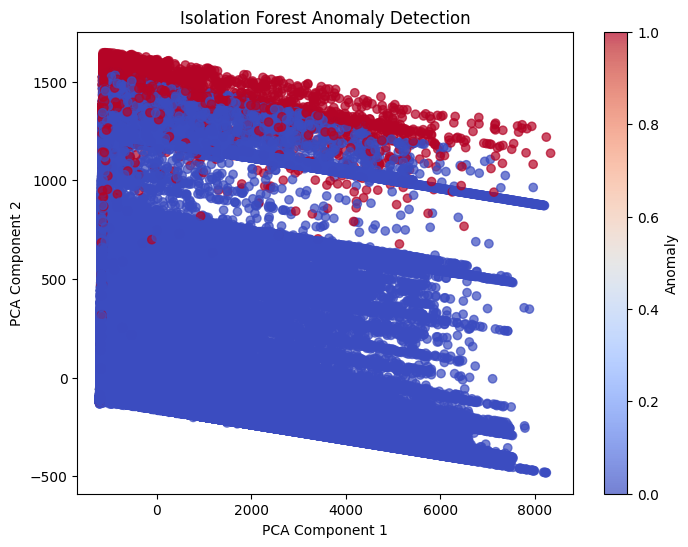

In [ ]:
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# Initialize Isolation Forest
iso_forest = IsolationForest(n_estimators=100, max_samples='auto', contamination=0.01, random_state=42)
# Note: Adjust 'contamination' to represent the expected proportion of anomalies

# Fit the model and predict anomalies (-1 indicates anomaly)
anomaly_labels = iso_forest.fit_predict(X2)
X2['Anomaly'] = anomaly_labels  # Add results to the dataset

# Visualizing results (using PCA for dimensionality reduction)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X2)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=(anomaly_labels == -1), cmap='coolwarm', alpha=0.7)
plt.title("Isolation Forest Anomaly Detection")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Anomaly")
plt.show()

In [ ]:
anomaly_percentage = (X2['Anomaly'] == -1).mean() * 100
print(f"Percentage of anomalies: {anomaly_percentage:.2f}%")


Percentage of anomalies: 1.00%
